/tmp/ipython-input-2943841305.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)
/tmp/ipython-input-2943841305.py:6: RuntimeWarning: invalid value encountered in divide
  return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)


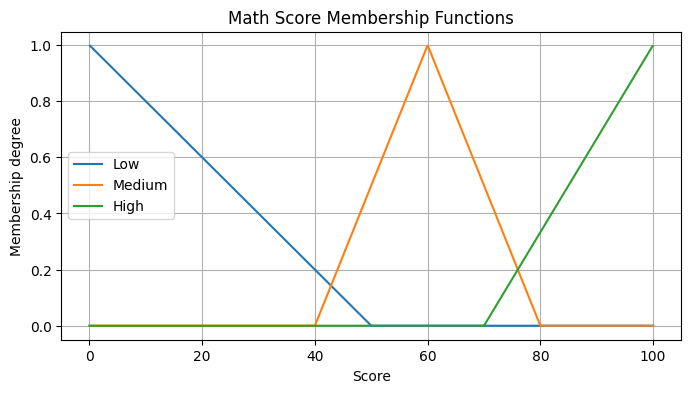

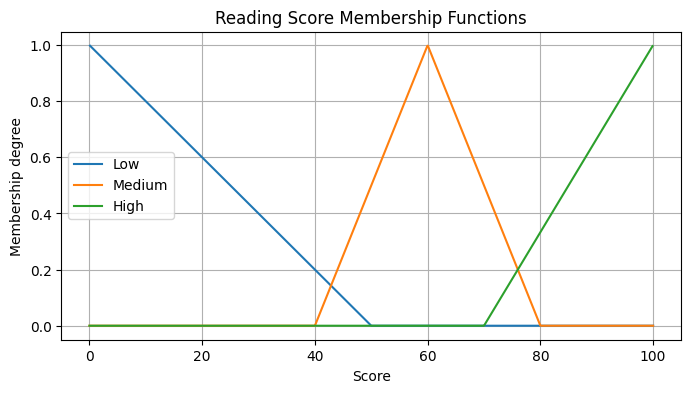

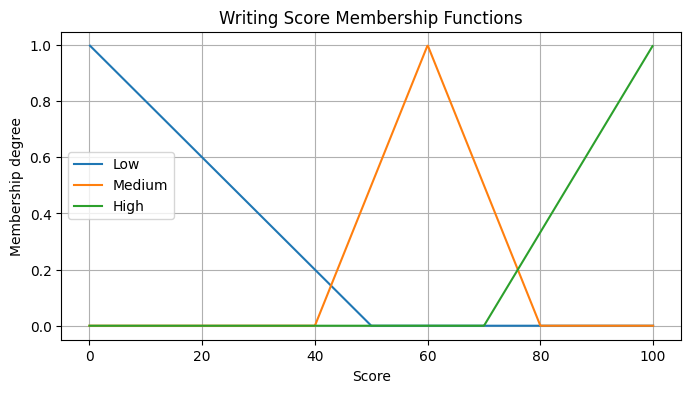

/tmp/ipython-input-2943841305.py:10: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum(np.minimum((x-a)/(b-a), 1), (d-x)/(d-c)), 0)
/tmp/ipython-input-2943841305.py:10: RuntimeWarning: invalid value encountered in divide
  return np.maximum(np.minimum(np.minimum((x-a)/(b-a), 1), (d-x)/(d-c)), 0)


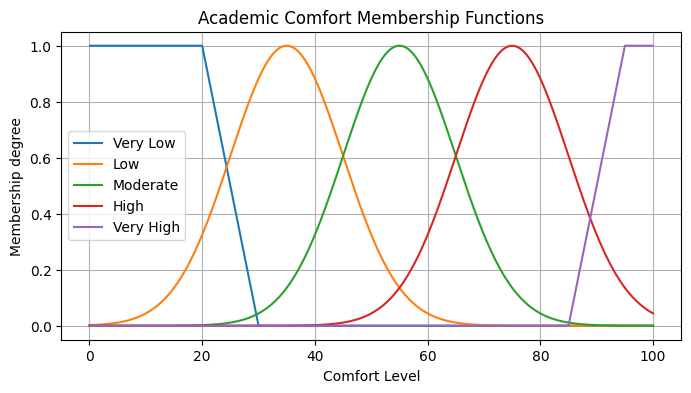

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Triangular membership function
def triangular(x, a, b, c):
    return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)

# Trapezoidal membership function
def trapezoidal(x, a, b, c, d):
    return np.maximum(np.minimum(np.minimum((x-a)/(b-a), 1), (d-x)/(d-c)), 0)

# Gaussian membership function
def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu)/sigma)**2)

# Define input ranges
x_scores = np.linspace(0, 100, 1000)

# Input: Math, Reading, Writing (Triangular)
terms = ['Low', 'Medium', 'High']
mf_params = {
    'Low': (0, 0, 50),
    'Medium': (40, 60, 80),
    'High': (70, 100, 100)
}

def plot_input(variable_name):
    plt.figure(figsize=(8,4))
    for term in terms:
        y = triangular(x_scores, *mf_params[term])
        plt.plot(x_scores, y, label=term)
    plt.title(f'{variable_name} Score Membership Functions')
    plt.xlabel('Score')
    plt.ylabel('Membership degree')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot Math, Reading, Writing
plot_input('Math')
plot_input('Reading')
plot_input('Writing')

# Output: Academic Comfort
x_comfort = np.linspace(0, 100, 1000)
plt.figure(figsize=(8,4))

# Very Low: Trapezoidal
plt.plot(x_comfort, trapezoidal(x_comfort, 0, 0, 20, 30), label='Very Low')

# Low: Gaussian
plt.plot(x_comfort, gaussian(x_comfort, 35, 10), label='Low')

# Moderate: Gaussian
plt.plot(x_comfort, gaussian(x_comfort, 55, 10), label='Moderate')

# High: Gaussian
plt.plot(x_comfort, gaussian(x_comfort, 75, 10), label='High')

# Very High: Trapezoidal
plt.plot(x_comfort, trapezoidal(x_comfort, 85, 95, 100, 100), label='Very High')

plt.title('Academic Comfort Membership Functions')
plt.xlabel('Comfort Level')
plt.ylabel('Membership degree')
plt.grid(True)
plt.legend()
plt.show()


/tmp/ipython-input-3469149726.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)
/tmp/ipython-input-3469149726.py:6: RuntimeWarning: invalid value encountered in divide
  return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)
/tmp/ipython-input-3469149726.py:9: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum(np.minimum((x-a)/(b-a), 1), (d-x)/(d-c)), 0)
/tmp/ipython-input-3469149726.py:9: RuntimeWarning: invalid value encountered in divide
  return np.maximum(np.minimum(np.minimum((x-a)/(b-a), 1), (d-x)/(d-c)), 0)


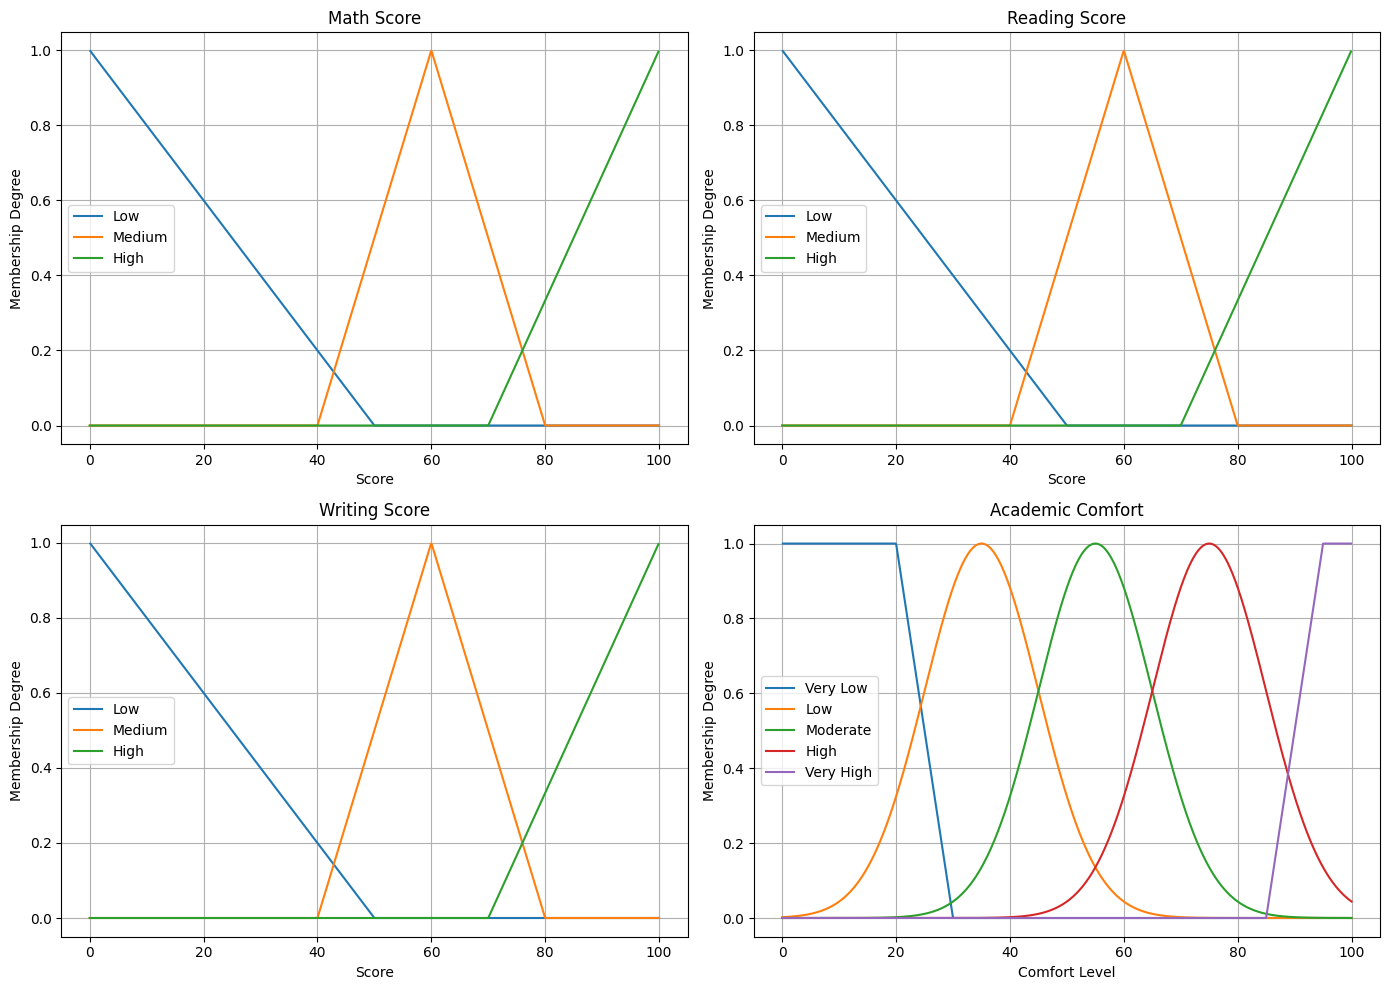

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Membership functions
def triangular(x, a, b, c):
    return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)

def trapezoidal(x, a, b, c, d):
    return np.maximum(np.minimum(np.minimum((x-a)/(b-a), 1), (d-x)/(d-c)), 0)

def gaussian(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu)/sigma)**2)

# Input ranges
x_scores = np.linspace(0, 100, 1000)
terms = ['Low', 'Medium', 'High']
mf_params = {
    'Low': (0, 0, 50),
    'Medium': (40, 60, 80),
    'High': (70, 100, 100)
}

# Create subplots for inputs and output
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Function to plot input MFs
def plot_input(ax, variable_name):
    for term in terms:
        y = triangular(x_scores, *mf_params[term])
        ax.plot(x_scores, y, label=term)
    ax.set_title(f'{variable_name} Score')
    ax.set_xlabel('Score')
    ax.set_ylabel('Membership Degree')
    ax.grid(True)
    ax.legend()

# Plot all input variables
plot_input(axes[0], 'Math')
plot_input(axes[1], 'Reading')
plot_input(axes[2], 'Writing')

# Output: Academic Comfort
x_comfort = np.linspace(0, 100, 1000)
axes[3].plot(x_comfort, trapezoidal(x_comfort, 0, 0, 20, 30), label='Very Low')
axes[3].plot(x_comfort, gaussian(x_comfort, 35, 10), label='Low')
axes[3].plot(x_comfort, gaussian(x_comfort, 55, 10), label='Moderate')
axes[3].plot(x_comfort, gaussian(x_comfort, 75, 10), label='High')
axes[3].plot(x_comfort, trapezoidal(x_comfort, 85, 95, 100, 100), label='Very High')

axes[3].set_title('Academic Comfort')
axes[3].set_xlabel('Comfort Level')
axes[3].set_ylabel('Membership Degree')
axes[3].grid(True)
axes[3].legend()

plt.tight_layout()
plt.show()


In [3]:
pip install scikit-fuzzy pandas numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.8 MB/s eta 0:00:00


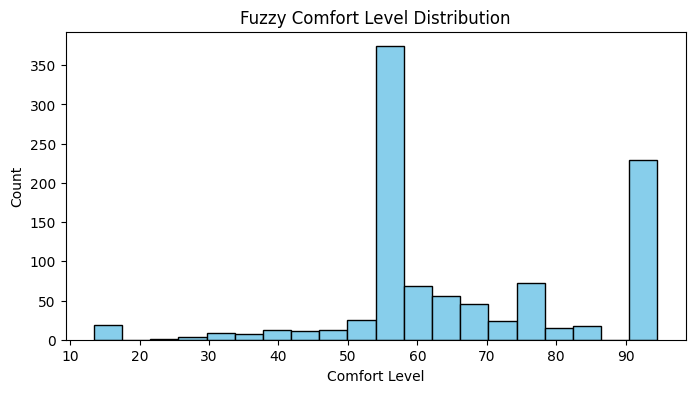

Predicted Academic Comfort: 74.75


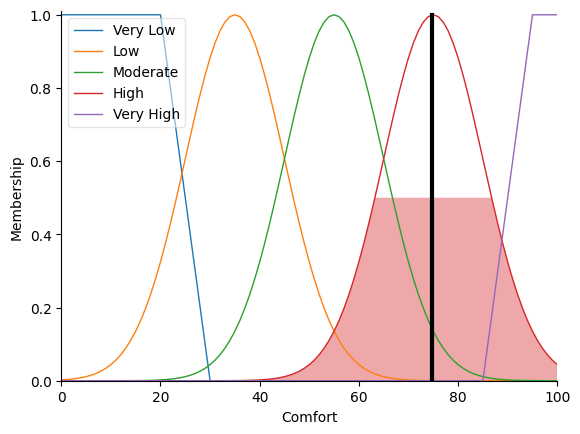

In [5]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ------------------------------
# Load Dataset
# ------------------------------
df = pd.read_csv('StudentsPerformance.csv')  # adjust filename if needed

# Use Math, Reading, Writing scores
math = df['math score']
reading = df['reading score']
writing = df['writing score']

# ------------------------------
# Define Fuzzy Variables
# ------------------------------

# Input variables
math_score = ctrl.Antecedent(np.arange(0, 101, 1), 'Math')
reading_score = ctrl.Antecedent(np.arange(0, 101, 1), 'Reading')
writing_score = ctrl.Antecedent(np.arange(0, 101, 1), 'Writing')

# Output variable
comfort = ctrl.Consequent(np.arange(0, 101, 1), 'Comfort')

# ------------------------------
# Membership Functions
# ------------------------------

# Triangular for inputs
math_score['Low'] = fuzz.trimf(math_score.universe, [0, 0, 50])
math_score['Medium'] = fuzz.trimf(math_score.universe, [40, 60, 80])
math_score['High'] = fuzz.trimf(math_score.universe, [70, 100, 100])

reading_score['Low'] = fuzz.trimf(reading_score.universe, [0, 0, 50])
reading_score['Medium'] = fuzz.trimf(reading_score.universe, [40, 60, 80])
reading_score['High'] = fuzz.trimf(reading_score.universe, [70, 100, 100])

writing_score['Low'] = fuzz.trimf(writing_score.universe, [0, 0, 50])
writing_score['Medium'] = fuzz.trimf(writing_score.universe, [40, 60, 80])
writing_score['High'] = fuzz.trimf(writing_score.universe, [70, 100, 100])

# Trapezoidal + Gaussian for output
comfort['Very Low'] = fuzz.trapmf(comfort.universe, [0, 0, 20, 30])
comfort['Low'] = fuzz.gaussmf(comfort.universe, 35, 10)
comfort['Moderate'] = fuzz.gaussmf(comfort.universe, 55, 10)
comfort['High'] = fuzz.gaussmf(comfort.universe, 75, 10)
comfort['Very High'] = fuzz.trapmf(comfort.universe, [85, 95, 100, 100])

# ------------------------------
# Define Rules (Mamdani)
# ------------------------------

rules = [
    ctrl.Rule(math_score['Low'] & reading_score['Low'] & writing_score['Low'], comfort['Very Low']),
    ctrl.Rule(math_score['Low'] & reading_score['Medium'] & writing_score['Low'], comfort['Low']),
    ctrl.Rule(math_score['Medium'] & reading_score['Low'] & writing_score['Medium'], comfort['Low']),
    ctrl.Rule(math_score['Medium'] & reading_score['Medium'] & writing_score['Medium'], comfort['Moderate']),
    ctrl.Rule(math_score['High'] & reading_score['Medium'] & writing_score['Medium'], comfort['High']),
    ctrl.Rule(math_score['Medium'] & reading_score['High'] & writing_score['Medium'], comfort['High']),
    ctrl.Rule(math_score['Medium'] & reading_score['Medium'] & writing_score['High'], comfort['High']),
    ctrl.Rule(math_score['High'] & reading_score['High'] & writing_score['Medium'], comfort['Very High']),
    ctrl.Rule(math_score['Medium'] & reading_score['High'] & writing_score['High'], comfort['Very High']),
    ctrl.Rule(math_score['High'] & reading_score['Medium'] & writing_score['High'], comfort['Very High']),
    ctrl.Rule(math_score['Low'] & reading_score['High'] & writing_score['Medium'], comfort['Moderate']),
    ctrl.Rule(math_score['High'] & reading_score['Low'] & writing_score['Medium'], comfort['Moderate']),
    ctrl.Rule(math_score['Medium'] & reading_score['Low'] & writing_score['Low'], comfort['Low']),
    ctrl.Rule(math_score['Low'] & reading_score['Medium'] & writing_score['Medium'], comfort['Moderate']),
    ctrl.Rule(math_score['High'] & reading_score['High'] & writing_score['High'], comfort['Very High']),
]

# ------------------------------
# Build Control System
# ------------------------------

comfort_ctrl = ctrl.ControlSystem(rules)
comfort_sim = ctrl.ControlSystemSimulation(comfort_ctrl)

# ------------------------------
# Evaluate FIS on Dataset
# ------------------------------

results = []

for i, row in df.iterrows():
    comfort_sim.input['Math'] = row['math score']
    comfort_sim.input['Reading'] = row['reading score']
    comfort_sim.input['Writing'] = row['writing score']

    comfort_sim.compute()
    results.append(comfort_sim.output['Comfort'])

df['Comfort_Fuzzy'] = results

# ------------------------------
# Quick Visualization
# ------------------------------
plt.figure(figsize=(8,4))
plt.hist(df['Comfort_Fuzzy'], bins=20, color='skyblue', edgecolor='black')
plt.title('Fuzzy Comfort Level Distribution')
plt.xlabel('Comfort Level')
plt.ylabel('Count')
plt.show()

# ------------------------------
# Example: Test single student
# ------------------------------
comfort_sim.input['Math'] = 70
comfort_sim.input['Reading'] = 85
comfort_sim.input['Writing'] = 65
comfort_sim.compute()
print(f"Predicted Academic Comfort: {comfort_sim.output['Comfort']:.2f}")

# Visualize output membership for this input
comfort.view(sim=comfort_sim)


MAE between Fuzzy FIS and Crisp Baseline: 6.73


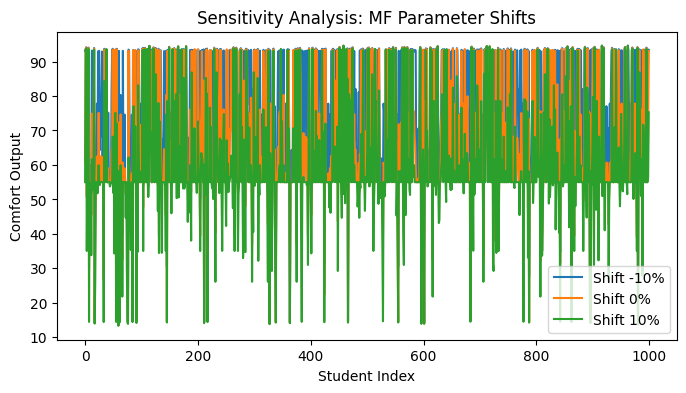

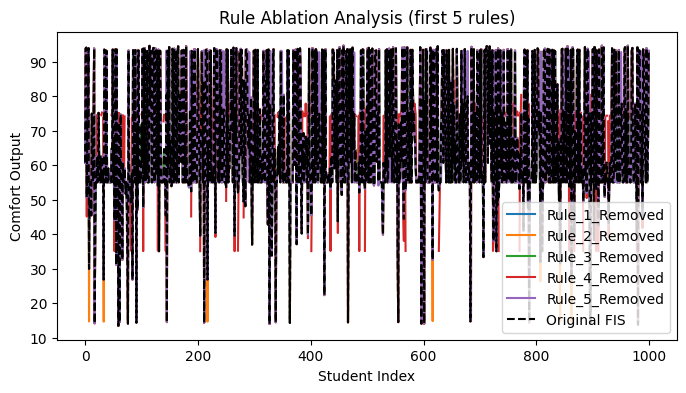

In [22]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.metrics import mean_absolute_error

# ------------------------------
# Load Dataset
# ------------------------------
df = pd.read_csv('StudentsPerformance.csv')  # adjust filename
math = df['math score']
reading = df['reading score']
writing = df['writing score']

# ------------------------------
# Define Global Fuzzy Variables
# ------------------------------
math_score = ctrl.Antecedent(np.arange(0, 101, 1), 'Math')
reading_score = ctrl.Antecedent(np.arange(0, 101, 1), 'Reading')
writing_score = ctrl.Antecedent(np.arange(0, 101, 1), 'Writing')
comfort = ctrl.Consequent(np.arange(0, 101, 1), 'Comfort')

# ------------------------------
# Membership Functions Definition Helper
# ------------------------------
def _define_mfs_for_vars(m_score_var, r_score_var, w_score_var, comfort_var, s_shift=0):
    # Input MFs
    # Low: Left shoulder [0, 0, end_point]
    low_c = max(0, 50 * (1 + s_shift))
    m_score_var['Low'] = fuzz.trimf(m_score_var.universe, [0, 0, low_c])
    r_score_var['Low'] = fuzz.trimf(r_score_var.universe, [0, 0, low_c])
    w_score_var['Low'] = fuzz.trimf(w_score_var.universe, [0, 0, low_c])

    # Medium: Symmetrical triangle [a, b, c]
    medium_a = 40 * (1 + s_shift)
    medium_b = 60 * (1 + s_shift)
    medium_c = 80 * (1 + s_shift)
    # Ensure a <= b <= c and all within [0, 100]
    medium_a = np.clip(medium_a, 0, 100)
    medium_b = np.clip(medium_b, medium_a, 100) # b must be >= a
    medium_c = np.clip(medium_c, medium_b, 100) # c must be >= b
    m_score_var['Medium'] = fuzz.trimf(m_score_var.universe, [medium_a, medium_b, medium_c])
    r_score_var['Medium'] = fuzz.trimf(r_score_var.universe, [medium_a, medium_b, medium_c])
    w_score_var['Medium'] = fuzz.trimf(w_score_var.universe, [medium_a, medium_b, medium_c])

    # High: Right shoulder [start_point, 100, 100]
    high_a = min(100, 70 * (1 + s_shift))
    m_score_var['High'] = fuzz.trimf(m_score_var.universe, [high_a, 100, 100])
    r_score_var['High'] = fuzz.trimf(r_score_var.universe, [high_a, 100, 100])
    w_score_var['High'] = fuzz.trimf(w_score_var.universe, [high_a, 100, 100])

    # Output MFs
    comfort_var['Very Low'] = fuzz.trapmf(comfort_var.universe, [0,0,20,30])
    comfort_var['Low'] = fuzz.gaussmf(comfort_var.universe, 35, 10)
    comfort_var['Moderate'] = fuzz.gaussmf(comfort_var.universe, 55, 10)
    comfort_var['High'] = fuzz.gaussmf(comfort_var.universe, 75, 10)
    comfort_var['Very High'] = fuzz.trapmf(comfort_var.universe, [85,95,100,100])

# Initial MFs for global variables
_define_mfs_for_vars(math_score, reading_score, writing_score, comfort, s_shift=0)

# ------------------------------
# Global Rule Base
# ------------------------------
rules = [
    ctrl.Rule(math_score['Low'] & reading_score['Low'] & writing_score['Low'], comfort['Very Low']),
    ctrl.Rule(math_score['Low'] & reading_score['Medium'] & writing_score['Low'], comfort['Low']),
    ctrl.Rule(math_score['Medium'] & reading_score['Low'] & writing_score['Medium'], comfort['Low']),
    ctrl.Rule(math_score['Medium'] & reading_score['Medium'] & writing_score['Medium'], comfort['Moderate']),
    ctrl.Rule(math_score['High'] & reading_score['Medium'] & writing_score['Medium'], comfort['High']),
    ctrl.Rule(math_score['Medium'] & reading_score['High'] & writing_score['Medium'], comfort['High']),
    ctrl.Rule(math_score['Medium'] & reading_score['Medium'] & writing_score['High'], comfort['High']),
    ctrl.Rule(math_score['High'] & reading_score['High'] & writing_score['Medium'], comfort['Very High']),
    ctrl.Rule(math_score['Medium'] & reading_score['High'] & writing_score['High'], comfort['Very High']),
    ctrl.Rule(math_score['High'] & reading_score['Medium'] & writing_score['High'], comfort['Very High']),
    ctrl.Rule(math_score['Low'] & reading_score['High'] & writing_score['Medium'], comfort['Moderate']),
    ctrl.Rule(math_score['High'] & reading_score['Low'] & writing_score['Medium'], comfort['Moderate']),
    ctrl.Rule(math_score['Medium'] & reading_score['Low'] & writing_score['Low'], comfort['Low']),
    ctrl.Rule(math_score['Low'] & reading_score['Medium'] & writing_score['Medium'], comfort['Moderate']),
    ctrl.Rule(math_score['High'] & reading_score['High'] & writing_score['High'], comfort['Very High']),
]

# ------------------------------
# Baseline Crisp Rule
# ------------------------------
def baseline_crisp(row):
    avg = (row['math score'] + row['reading score'] + row['writing score'])/3
    if avg < 40:
        return 20
    elif avg < 55:
        return 40
    elif avg < 70:
        return 55
    elif avg < 85:
        return 75
    else:
        return 90

df['Comfort_Crisp'] = df.apply(baseline_crisp, axis=1)

# ------------------------------
# FIS Evaluation Function
# ------------------------------
def evaluate_fis(ruleset, df_input):
    ctrl_system = ctrl.ControlSystem(rules=ruleset)
    sim = ctrl.ControlSystemSimulation(ctrl_system)
    outputs = []
    for _, row in df_input.iterrows():
        for var in sim.ctrl.antecedents:
            # Extract base name from variable label to match DataFrame columns
            col_name = var.label.split('_')[0].lower() + ' score'
            sim.input[var.label] = row[col_name]
        try:
            sim.compute()
            # Extract output dynamically, handle cases where output might be empty
            if sim.output:
                outputs.append(list(sim.output.values())[0])
            else:
                outputs.append(np.nan) # Append NaN if no output is computed
        except ValueError:
            # Catch ValueError if compute fails (e.g., no rules fire)
            outputs.append(np.nan)
    return np.array(outputs)

# ------------------------------
# Compute Global FIS Output
# ------------------------------
df['Comfort_Fuzzy'] = evaluate_fis(rules, df)

# ------------------------------
# Sensitivity Analysis
# ------------------------------
def sensitivity_analysis(df_input, delta=0.1):
    shifts = [-delta, 0, delta]
    results = {}

    for s in shifts:
        # Build temporary variables with unique labels
        math_var = ctrl.Antecedent(np.arange(0, 101, 1), f'Math_{s}')
        reading_var = ctrl.Antecedent(np.arange(0, 101, 1), f'Reading_{s}')
        writing_var = ctrl.Antecedent(np.arange(0, 101, 1), f'Writing_{s}')
        comfort_var = ctrl.Consequent(np.arange(0, 101, 1), f'Comfort_{s}')

        _define_mfs_for_vars(math_var, reading_var, writing_var, comfort_var, s_shift=s)

        temp_rules = [
            ctrl.Rule(math_var['Low'] & reading_var['Low'] & writing_var['Low'], comfort_var['Very Low']),
            ctrl.Rule(math_var['Low'] & reading_var['Medium'] & writing_var['Low'], comfort_var['Low']),
            ctrl.Rule(math_var['Medium'] & reading_var['Low'] & writing_var['Medium'], comfort_var['Low']),
            ctrl.Rule(math_var['Medium'] & reading_var['Medium'] & writing_var['Medium'], comfort_var['Moderate']),
            ctrl.Rule(math_var['High'] & reading_var['Medium'] & writing_var['Medium'], comfort_var['High']),
            ctrl.Rule(math_var['Medium'] & reading_var['High'] & writing_var['Medium'], comfort_var['High']),
            ctrl.Rule(math_var['Medium'] & reading_var['Medium'] & writing_var['High'], comfort_var['High']),
            ctrl.Rule(math_var['High'] & reading_var['High'] & writing_var['Medium'], comfort_var['Very High']),
            ctrl.Rule(math_var['Medium'] & reading_var['High'] & writing_var['High'], comfort_var['Very High']),
            ctrl.Rule(math_var['High'] & reading_var['Medium'] & writing_var['High'], comfort_var['Very High']),
            ctrl.Rule(math_var['Low'] & reading_var['High'] & writing_var['Medium'], comfort_var['Moderate']),
            ctrl.Rule(math_var['High'] & reading_var['Low'] & writing_var['Medium'], comfort_var['Moderate']),
            ctrl.Rule(math_var['Medium'] & reading_var['Low'] & writing_var['Low'], comfort_var['Low']),
            ctrl.Rule(math_var['Low'] & reading_var['Medium'] & writing_var['Medium'], comfort_var['Moderate']),
            ctrl.Rule(math_var['High'] & reading_var['High'] & writing_var['High'], comfort_var['Very High']),
        ]

        results[s] = evaluate_fis(temp_rules, df_input)

    return results

sensitivity_results = sensitivity_analysis(df)

# ------------------------------
# Rule Ablation Analysis
# ------------------------------
ablation_results = {}
for i in range(len(rules)):
    temp_rules = deepcopy(rules)
    temp_rules.pop(i)
    ablation_results[f'Rule_{i+1}_Removed'] = evaluate_fis(temp_rules, df)

# ------------------------------
# Compare Performance
# ------------------------------
mae_fuzzy_vs_crisp = mean_absolute_error(df['Comfort_Crisp'], df['Comfort_Fuzzy'])
print(f"MAE between Fuzzy FIS and Crisp Baseline: {mae_fuzzy_vs_crisp:.2f}")

# ------------------------------
# Visualize Sensitivity Analysis
# ------------------------------
plt.figure(figsize=(8,4))
for key, val in sensitivity_results.items():
    plt.plot(val, label=f'Shift {key*100:.0f}%')
plt.title('Sensitivity Analysis: MF Parameter Shifts')
plt.xlabel('Student Index')
plt.ylabel('Comfort Output')
plt.legend()
plt.show()

# ------------------------------
# Visualize Rule Ablation (first 5 rules)
# ------------------------------
plt.figure(figsize=(8,4))
for key, val in list(ablation_results.items())[:5]:
    plt.plot(val, label=key)
plt.plot(df['Comfort_Fuzzy'], '--k', label='Original FIS')
plt.title('Rule Ablation Analysis (first 5 rules)')
plt.xlabel('Student Index')
plt.ylabel('Comfort Output')
plt.legend()
plt.show()


In [23]:
def evaluate_fis(ruleset, df_input):
    ctrl_system = ctrl.ControlSystem(rules=ruleset)
    sim = ctrl.ControlSystemSimulation(ctrl_system)
    outputs = []
    for _, row in df_input.iterrows():
        for var in sim.ctrl.inputs:
            sim.input[var.label] = row[var.label.lower() + ' score']
        sim.compute()
        if len(sim.output) > 0:
            outputs.append(list(sim.output.values())[0])
        else:
            outputs.append(np.nan)  # or a default value like 0
    return np.array(outputs)


In [14]:
def evaluate_fis(ruleset):
    ctrl_system = ctrl.ControlSystem(rules=ruleset)
    sim = ctrl.ControlSystemSimulation(ctrl_system)
    outputs = []
    for _, row in df.iterrows():
        sim.input['Math'] = row['math score']
        sim.input['Reading'] = row['reading score']
        sim.input['Writing'] = row['writing score']
        sim.compute()
        # Access output dynamically, regardless of which Consequent object was used
        outputs.append(list(sim.output.values())[0])
    return np.array(outputs)


In [16]:
def build_temp_fis(s_shift):
    # Create fresh variables with unique names
    math_var = ctrl.Antecedent(np.arange(0, 101, 1), f'Math_{s_shift}')
    reading_var = ctrl.Antecedent(np.arange(0, 101, 1), f'Reading_{s_shift}')
    writing_var = ctrl.Antecedent(np.arange(0, 101, 1), f'Writing_{s_shift}')
    comfort_var = ctrl.Consequent(np.arange(0, 101, 1), f'Comfort_{s_shift}')

    _define_mfs_for_vars(math_var, reading_var, writing_var, comfort_var, s_shift=s_shift)

    rules = [
        ctrl.Rule(math_var['Low'] & reading_var['Low'] & writing_var['Low'], comfort_var['Very Low']),
        # ... all other rules, replacing temp variables
    ]

    return rules, [math_var, reading_var, writing_var], comfort_var


MAE (Fuzzy vs Baseline): 6.73
Accuracy Proxy (% within ±10 of baseline): 69.00%


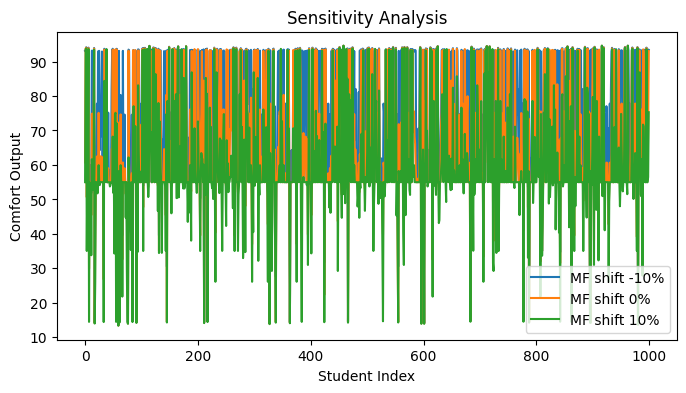

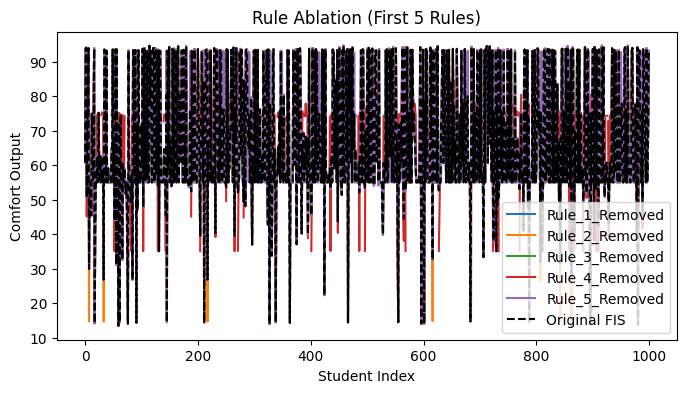

In [26]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from copy import deepcopy
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('StudentsPerformance.csv')

# ------------------------------
# Define Global Fuzzy Variables (used for initial setup and ablation, not sensitivity)
# ------------------------------
math = ctrl.Antecedent(np.arange(0, 101, 1), 'Math')
reading = ctrl.Antecedent(np.arange(0, 101, 1), 'Reading')
writing = ctrl.Antecedent(np.arange(0, 101, 1), 'Writing')
comfort = ctrl.Consequent(np.arange(0, 101, 1), 'Comfort')

# ------------------------------
# Membership Functions Definition Helper
# ------------------------------
def _define_mfs_for_vars(m_score_var, r_score_var, w_score_var, comfort_var, s_shift=0):
    # Input MFs
    low_c = max(0, 50 * (1 + s_shift))
    m_score_var['Low'] = fuzz.trimf(m_score_var.universe, [0, 0, low_c])
    r_score_var['Low'] = fuzz.trimf(r_score_var.universe, [0, 0, low_c])
    w_score_var['Low'] = fuzz.trimf(w_score_var.universe, [0, 0, low_c])

    medium_a = 40 * (1 + s_shift)
    medium_b = 60 * (1 + s_shift)
    medium_c = 80 * (1 + s_shift)
    medium_a = np.clip(medium_a, 0, 100)
    medium_b = np.clip(medium_b, medium_a, 100)
    medium_c = np.clip(medium_c, medium_b, 100)
    m_score_var['Medium'] = fuzz.trimf(m_score_var.universe, [medium_a, medium_b, medium_c])
    r_score_var['Medium'] = fuzz.trimf(r_score_var.universe, [medium_a, medium_b, medium_c])
    w_score_var['Medium'] = fuzz.trimf(w_score_var.universe, [medium_a, medium_b, medium_c])

    high_a = min(100, 70 * (1 + s_shift))
    m_score_var['High'] = fuzz.trimf(m_score_var.universe, [high_a, 100, 100])
    r_score_var['High'] = fuzz.trimf(r_score_var.universe, [high_a, 100, 100])
    w_score_var['High'] = fuzz.trimf(w_score_var.universe, [high_a, 100, 100])

    # Output MFs (not shifted in this analysis)
    comfort_var['Very Low'] = fuzz.trapmf(comfort_var.universe, [0, 0, 20, 30])
    comfort_var['Low'] = fuzz.gaussmf(comfort_var.universe, 35, 10)
    comfort_var['Moderate'] = fuzz.gaussmf(comfort_var.universe, 55, 10)
    comfort_var['High'] = fuzz.gaussmf(comfort_var.universe, 75, 10)
    comfort_var['Very High'] = fuzz.trapmf(comfort_var.universe, [85, 95, 100, 100])

_define_mfs_for_vars(math, reading, writing, comfort, s_shift=0)

# ------------------------------
# Define Rule Base (using global variables initially)
# ------------------------------
rules = [
    ctrl.Rule(math['Low'] & reading['Low'] & writing['Low'], comfort['Very Low']),
    ctrl.Rule(math['Low'] & reading['Medium'] & writing['Low'], comfort['Low']),
    ctrl.Rule(math['Medium'] & reading['Low'] & writing['Medium'], comfort['Low']),
    ctrl.Rule(math['Medium'] & reading['Medium'] & writing['Medium'], comfort['Moderate']),
    ctrl.Rule(math['High'] & reading['Medium'] & writing['Medium'], comfort['High']),
    ctrl.Rule(math['Medium'] & reading['High'] & writing['Medium'], comfort['High']),
    ctrl.Rule(math['Medium'] & reading['Medium'] & writing['High'], comfort['High']),
    ctrl.Rule(math['High'] & reading['High'] & writing['Medium'], comfort['Very High']),
    ctrl.Rule(math['Medium'] & reading['High'] & writing['High'], comfort['Very High']),
    ctrl.Rule(math['High'] & reading['Medium'] & writing['High'], comfort['Very High']),
    ctrl.Rule(math['Low'] & reading['High'] & writing['Medium'], comfort['Moderate']),
    ctrl.Rule(math['High'] & reading['Low'] & writing['Medium'], comfort['Moderate']),
    ctrl.Rule(math['Medium'] & reading['Low'] & writing['Low'], comfort['Low']),
    ctrl.Rule(math['Low'] & reading['Medium'] & writing['Medium'], comfort['Moderate']),
    ctrl.Rule(math['High'] & reading['High'] & writing['High'], comfort['Very High']),
]

# ------------------------------
# Baseline: Crisp Rule
# ------------------------------
def baseline_crisp(row):
    avg = (row['math score'] + row['reading score'] + row['writing score']) / 3
    if avg < 40: return 20
    elif avg < 55: return 40
    elif avg < 70: return 55
    elif avg < 85: return 75
    else: return 90

df['Comfort_Crisp'] = df.apply(baseline_crisp, axis=1)

# ------------------------------
# FIS Evaluation Function
# ------------------------------
def evaluate_fis(ruleset, df_input):
    system = ctrl.ControlSystem(ruleset)
    sim = ctrl.ControlSystemSimulation(system)
    outputs = []
    for _, row in df_input.iterrows():
        for var in sim.ctrl.antecedents:
            # Extract base name from variable label to match DataFrame columns
            col_name = var.label.split('_')[0].lower() + ' score'
            sim.input[var.label] = row[col_name]
        try:
            sim.compute()
            if sim.output:
                outputs.append(list(sim.output.values())[0])
            else:
                outputs.append(np.nan) # Append NaN if no output is computed
        except ValueError:
            outputs.append(np.nan)
    return np.array(outputs)

# ------------------------------
# Full FIS Evaluation
# ------------------------------
comfort_fuzzy = evaluate_fis(rules, df)
df['Comfort_Fuzzy'] = comfort_fuzzy

# ------------------------------
# Sensitivity Analysis (±10%)
# ------------------------------
def sensitivity_analysis(df_input, delta=0.1):
    results = {}
    shifts = [-delta, 0, delta]
    for s in shifts:
        # Create new, temporary fuzzy variables for each shift
        temp_math = ctrl.Antecedent(np.arange(0, 101, 1), f'Math_{s}')
        temp_reading = ctrl.Antecedent(np.arange(0, 101, 1), f'Reading_{s}')
        temp_writing = ctrl.Antecedent(np.arange(0, 101, 1), f'Writing_{s}')
        temp_comfort = ctrl.Consequent(np.arange(0, 101, 1), f'Comfort_{s}')

        # Define MFs for these temporary variables with the shift
        _define_mfs_for_vars(temp_math, temp_reading, temp_writing, temp_comfort, s_shift=s)

        # Create new rules referencing these temporary variables
        temp_rules = [
            ctrl.Rule(temp_math['Low'] & temp_reading['Low'] & temp_writing['Low'], temp_comfort['Very Low']),
            ctrl.Rule(temp_math['Low'] & temp_reading['Medium'] & temp_writing['Low'], temp_comfort['Low']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['Low'] & temp_writing['Medium'], temp_comfort['Low']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['Medium'] & temp_writing['Medium'], temp_comfort['Moderate']),
            ctrl.Rule(temp_math['High'] & temp_reading['Medium'] & temp_writing['Medium'], temp_comfort['High']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['High'] & temp_writing['Medium'], temp_comfort['High']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['Medium'] & temp_writing['High'], temp_comfort['High']),
            ctrl.Rule(temp_math['High'] & temp_reading['High'] & temp_writing['Medium'], temp_comfort['Very High']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['High'] & temp_writing['High'], temp_comfort['Very High']),
            ctrl.Rule(temp_math['High'] & temp_reading['Medium'] & temp_writing['High'], temp_comfort['Very High']),
            ctrl.Rule(temp_math['Low'] & temp_reading['High'] & temp_writing['Medium'], temp_comfort['Moderate']),
            ctrl.Rule(temp_math['High'] & temp_reading['Low'] & temp_writing['Medium'], temp_comfort['Moderate']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['Low'] & temp_writing['Low'], temp_comfort['Low']),
            ctrl.Rule(temp_math['Low'] & temp_reading['Medium'] & temp_writing['Medium'], temp_comfort['Moderate']),
            ctrl.Rule(temp_math['High'] & temp_reading['High'] & temp_writing['High'], temp_comfort['Very High']),
        ]
        outputs = evaluate_fis(temp_rules, df_input)
        results[s] = outputs
    return results

sensitivity_results = sensitivity_analysis(df)

# ------------------------------
# Rule Ablation
# ------------------------------
ablation_results = {}
for i in range(len(rules)):
    temp_rules = deepcopy(rules) # Deepcopy the original global rules
    temp_rules.pop(i)
    outputs = evaluate_fis(temp_rules, df)
    ablation_results[f'Rule_{i+1}_Removed'] = outputs

# ------------------------------
# Performance Comparison
# ------------------------------
mae_fuzzy_vs_crisp = mean_absolute_error(df['Comfort_Crisp'], df['Comfort_Fuzzy'])
print(f"MAE (Fuzzy vs Baseline): {mae_fuzzy_vs_crisp:.2f}")

# Optional: Accuracy Proxy (% within ±10 of baseline)
accuracy_proxy = np.mean(np.abs(df['Comfort_Fuzzy'] - df['Comfort_Crisp']) <= 10) * 100
print(f"Accuracy Proxy (% within ±10 of baseline): {accuracy_proxy:.2f}%")

# Optional: visualize sensitivity analysis
plt.figure(figsize=(8,4))
for key, val in sensitivity_results.items():
    plt.plot(val, label=f'MF shift {key*100:.0f}%')
plt.xlabel('Student Index')
plt.ylabel('Comfort Output')
plt.title('Sensitivity Analysis')
plt.legend()
plt.show()

# Optional: visualize rule ablation
plt.figure(figsize=(8,4))
for key, val in list(ablation_results.items())[:5]:
    plt.plot(val, label=key)
plt.plot(df['Comfort_Fuzzy'], '--k', label='Original FIS')
plt.xlabel('Student Index')
plt.ylabel('Comfort Output')
plt.title('Rule Ablation (First 5 Rules)')
plt.legend()
plt.show()

In [27]:
def sensitivity_analysis(df_input, delta=0.1):
    results = {}
    shifts = [-delta, 0, delta]

    for s in shifts:
        # Create temporary fuzzy variables with unique labels
        temp_math = ctrl.Antecedent(np.arange(0, 101, 1), f'Math_{s}')
        temp_reading = ctrl.Antecedent(np.arange(0, 101, 1), f'Reading_{s}')
        temp_writing = ctrl.Antecedent(np.arange(0, 101, 1), f'Writing_{s}')
        temp_comfort = ctrl.Consequent(np.arange(0, 101, 1), f'Comfort_{s}')

        # Define membership functions with shift
        temp_math['Low'] = fuzz.trimf(temp_math.universe, [0,0,50*(1+s)])
        temp_math['Medium'] = fuzz.trimf(temp_math.universe, [40*(1+s),60*(1+s),80*(1+s)])
        temp_math['High'] = fuzz.trimf(temp_math.universe, [70*(1+s),100*(1+s),100])

        temp_reading['Low'] = fuzz.trimf(temp_reading.universe, [0,0,50*(1+s)])
        temp_reading['Medium'] = fuzz.trimf(temp_reading.universe, [40*(1+s),60*(1+s),80*(1+s)])
        temp_reading['High'] = fuzz.trimf(temp_reading.universe, [70*(1+s),100*(1+s),100])

        temp_writing['Low'] = fuzz.trimf(temp_writing.universe, [0,0,50*(1+s)])
        temp_writing['Medium'] = fuzz.trimf(temp_writing.universe, [40*(1+s),60*(1+s),80*(1+s)])
        temp_writing['High'] = fuzz.trimf(temp_writing.universe, [70*(1+s),100*(1+s),100])

        temp_comfort['Very Low'] = fuzz.trapmf(temp_comfort.universe, [0,0,20,30])
        temp_comfort['Low'] = fuzz.gaussmf(temp_comfort.universe, 35, 10)
        temp_comfort['Moderate'] = fuzz.gaussmf(temp_comfort.universe, 55, 10)
        temp_comfort['High'] = fuzz.gaussmf(temp_comfort.universe, 75, 10)
        temp_comfort['Very High'] = fuzz.trapmf(temp_comfort.universe, [85,95,100,100])

        # Build temporary rules using these new variables
        temp_rules = [
            ctrl.Rule(temp_math['Low'] & temp_reading['Low'] & temp_writing['Low'], temp_comfort['Very Low']),
            ctrl.Rule(temp_math['Low'] & temp_reading['Medium'] & temp_writing['Low'], temp_comfort['Low']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['Low'] & temp_writing['Medium'], temp_comfort['Low']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['Medium'] & temp_writing['Medium'], temp_comfort['Moderate']),
            ctrl.Rule(temp_math['High'] & temp_reading['Medium'] & temp_writing['Medium'], temp_comfort['High']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['High'] & temp_writing['Medium'], temp_comfort['High']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['Medium'] & temp_writing['High'], temp_comfort['High']),
            ctrl.Rule(temp_math['High'] & temp_reading['High'] & temp_writing['Medium'], temp_comfort['Very High']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['High'] & temp_writing['High'], temp_comfort['Very High']),
            ctrl.Rule(temp_math['High'] & temp_reading['Medium'] & temp_writing['High'], temp_comfort['Very High']),
            ctrl.Rule(temp_math['Low'] & temp_reading['High'] & temp_writing['Medium'], temp_comfort['Moderate']),
            ctrl.Rule(temp_math['High'] & temp_reading['Low'] & temp_writing['Medium'], temp_comfort['Moderate']),
            ctrl.Rule(temp_math['Medium'] & temp_reading['Low'] & temp_writing['Low'], temp_comfort['Low']),
            ctrl.Rule(temp_math['Low'] & temp_reading['Medium'] & temp_writing['Medium'], temp_comfort['Moderate']),
            ctrl.Rule(temp_math['High'] & temp_reading['High'] & temp_writing['High'], temp_comfort['Very High']),
        ]

        # Evaluate FIS with temporary rules
        system = ctrl.ControlSystem(temp_rules)
        sim = ctrl.ControlSystemSimulation(system)
        outputs = []
        for _, row in df_input.iterrows():
            sim.input[temp_math.label] = row['math score']
            sim.input[temp_reading.label] = row['reading score']
            sim.input[temp_writing.label] = row['writing score']
            sim.compute()
            outputs.append(list(sim.output.values())[0])
        results[s] = np.array(outputs)

    return results


In [30]:
import os
import numpy as np # Ensure numpy is imported
from sklearn.metrics import mean_absolute_error # Ensure mean_absolute_error is imported
import pandas as pd # Ensure pandas is imported

# Create the 'plots' directory if it doesn't exist
os.makedirs('plots', exist_ok=True)

# ------------------------------
# Compute MAE and Accuracy Proxy for Sensitivity Analysis
# ------------------------------
sensitivity_metrics = []
for shift, outputs in sensitivity_results.items():
    # Filter out NaNs for metric calculation, though sensitivity_results are expected to be clean
    valid_indices = ~np.isnan(outputs)
    filtered_outputs = outputs[valid_indices]
    filtered_crisp = df['Comfort_Crisp'][valid_indices]

    if len(filtered_outputs) > 0:
        mae = mean_absolute_error(filtered_crisp, filtered_outputs)
        acc = np.mean(np.abs(filtered_outputs - filtered_crisp) <= 10) * 100
        sensitivity_metrics.append({
            'MF Shift (%)': shift*100,
            'MAE': round(mae, 2),
            'Accuracy Proxy (%)': round(acc, 2)
        })
    else:
        sensitivity_metrics.append({
            'MF Shift (%)': shift*100,
            'MAE': np.nan,
            'Accuracy Proxy (%)': np.nan
        })

sensitivity_df = pd.DataFrame(sensitivity_metrics)
print("Sensitivity Analysis Metrics:")
print(sensitivity_df)

# Optional: save to CSV
sensitivity_df.to_csv('plots/sensitivity_metrics.csv', index=False)

# ------------------------------
# Compute MAE and Accuracy Proxy for Rule Ablation
# ------------------------------
ablation_metrics = []
for rule_name, outputs in ablation_results.items():
    # Filter out NaNs from outputs and corresponding crisp values
    valid_indices = ~np.isnan(outputs)
    filtered_outputs = outputs[valid_indices]
    filtered_crisp = df['Comfort_Crisp'][valid_indices]

    if len(filtered_outputs) > 0: # Ensure there are still valid samples to compute MAE/Accuracy
        mae = mean_absolute_error(filtered_crisp, filtered_outputs)
        acc = np.mean(np.abs(filtered_outputs - filtered_crisp) <= 10) * 100
        ablation_metrics.append({
            'Rule Removed': rule_name,
            'MAE': round(mae, 2),
            'Accuracy Proxy (%)': round(acc, 2)
        })
    else:
        # Handle case where all outputs are NaN after ablation (e.g., if a critical rule is removed)
        ablation_metrics.append({
            'Rule Removed': rule_name,
            'MAE': np.nan, # Or some other indicator
            'Accuracy Proxy (%)': np.nan
        })

ablation_df = pd.DataFrame(ablation_metrics)
print("Rule Ablation Metrics:")
print(ablation_df)

# Optional: save to CSV
ablation_df.to_csv('plots/rule_ablation_metrics.csv', index=False)


Sensitivity Analysis Metrics:
   MF Shift (%)    MAE  Accuracy Proxy (%)
0         -10.0  12.29                38.6
1           0.0   6.73                69.0
2          10.0   6.73                68.1
Rule Ablation Metrics:
       Rule Removed   MAE  Accuracy Proxy (%)
0    Rule_1_Removed  6.81               67.99
1    Rule_2_Removed  6.84               68.30
2    Rule_3_Removed  6.78               68.80
3    Rule_4_Removed  8.82               60.62
4    Rule_5_Removed  7.33               64.82
5    Rule_6_Removed  7.10               65.00
6    Rule_7_Removed  7.09               65.80
7    Rule_8_Removed  6.71               68.70
8    Rule_9_Removed  6.45               69.73
9   Rule_10_Removed  6.71               68.90
10  Rule_11_Removed  6.73               69.00
11  Rule_12_Removed  6.73               69.00
12  Rule_13_Removed  6.72               69.18
13  Rule_14_Removed  6.62               70.04
14  Rule_15_Removed  6.82               66.93
